# Voting Classifier

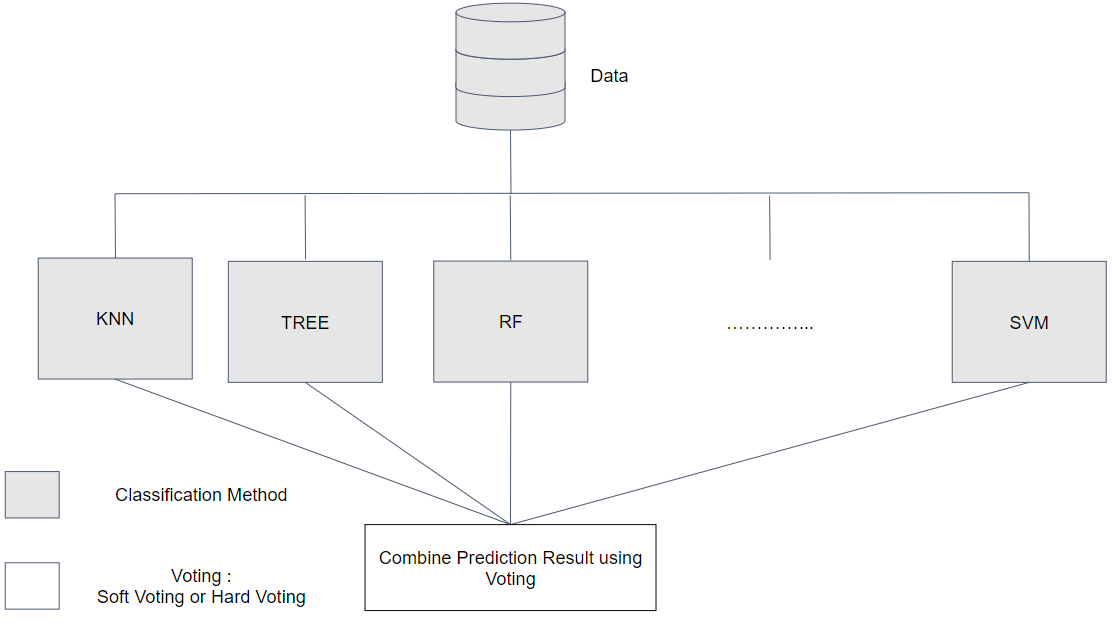

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

> ## Data

In [ ]:
wine = pd.read_csv('white_wine.csv')

In [ ]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)

In [ ]:
wine['label'] = np.where(wine['quality']>6,1,0)
X = wine[['alcohol','density']]
y = wine['label']

> ## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2, 
    random_state = 2020) # make the result consistent

> ## Modeling Base

Standalone model

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth = 5)
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
for clfs, clf_name in zip([lr,dt,knn],['Logistic Regression','Decision Tree','KNN']):
  clfs.fit(X_train, y_train)
  y_pred = clfs.predict(X_test)
  print(clf_name+":")
  print(classification_report(y_test,y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104

KNN:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        84
           1       0.75      0.75      0.75        20

    accuracy                           0.90       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.90      0.90

Voting Classifier

In [ ]:
lr = LogisticRegression(solver = 'liblinear', C = 0.01)
dt = DecisionTreeClassifier(max_depth = 5)
knn = KNeighborsClassifier(n_neighbors = 3)

vc = VotingClassifier([('clf1',lr),('clf2',dt),('clf3',knn)], voting = 'soft')

In [ ]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('clf1',
                              LogisticRegression(C=0.01, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('clf2',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterio...
                                        

In [ ]:
y_pred = vc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.85      0.92        20

    accuracy                           0.97       104
   macro avg       0.98      0.93      0.95       104
weighted avg       0.97      0.97      0.97       104



> ## Modeling Improvement 

Standalone model

In [ ]:
lr = LogisticRegression(solver = 'liblinear', C = 0.01)
lr_poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False)
pipe_lr = Pipeline([('preprocess',lr_poly),('clf',lr)])

dt = DecisionTreeClassifier(max_depth = 5)

knn = KNeighborsClassifier(n_neighbors = 3)
pipe_knn = Pipeline([('preprocess',StandardScaler()),('clf',knn)])

In [ ]:
for clfs, clf_name in zip([pipe_lr,dt,pipe_knn],['Logistic Regression','Decision Tree','KNN']):
  clfs.fit(X_train, y_train)
  y_pred = clfs.predict(X_test)
  print(clf_name+":")
  print(classification_report(y_test,y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104

KNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98

Voting Classifier

In [ ]:
lr = LogisticRegression()
lr_poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False)
pipe_lr = Pipeline([('preprocess',lr_poly),('clf',lr)])

dt = DecisionTreeClassifier(max_depth = 5)

knn = KNeighborsClassifier(n_neighbors = 3)
pipe_knn = Pipeline([('preprocess',StandardScaler()),('clf',knn)])

vc = VotingClassifier([('clf1',pipe_lr),('clf2',dt),('clf3',pipe_knn)], voting = 'soft')

In [ ]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('clf1',
                              Pipeline(memory=None,
                                       steps=[('preprocess',
                                               PolynomialFeatures(degree=3,
                                                                  include_bias=False,
                                                                  interaction_only=False,
                                                                  order='C')),
                                              ('clf',
                                               LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                       

In [ ]:
y_pred = vc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104



> ## Repeat "Model Base" and "Model Improvement" using hard voting

In [ ]:
# write your code here

# Random Forest

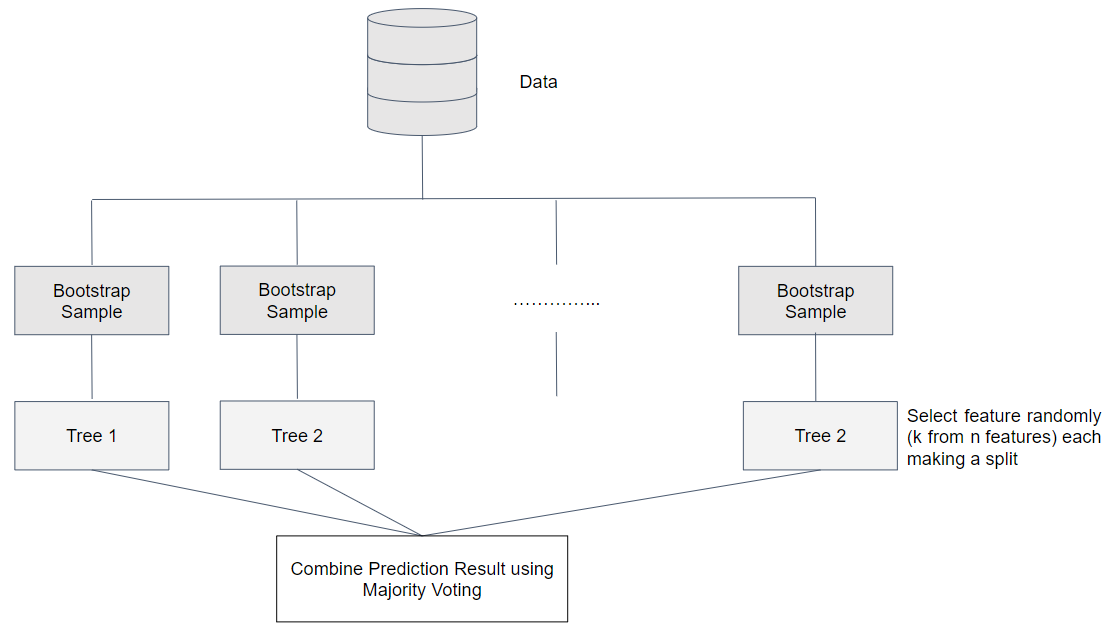

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

> ## Data

In [ ]:
bankloan = pd.read_csv('bankloan.csv')

In [ ]:
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [ ]:
fitur = ['age','employ','employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [ ]:
X = bankloan[fitur]
y = bankloan[target]

> ## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2, 
    random_state = 2020) # make the result consistent

> ## Modeling

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, max_features = 4, max_depth = 3)
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       103
           1       0.74      0.38      0.50        37

    accuracy                           0.80       140
   macro avg       0.77      0.66      0.69       140
weighted avg       0.79      0.80      0.78       140



> ## Decision Boundary

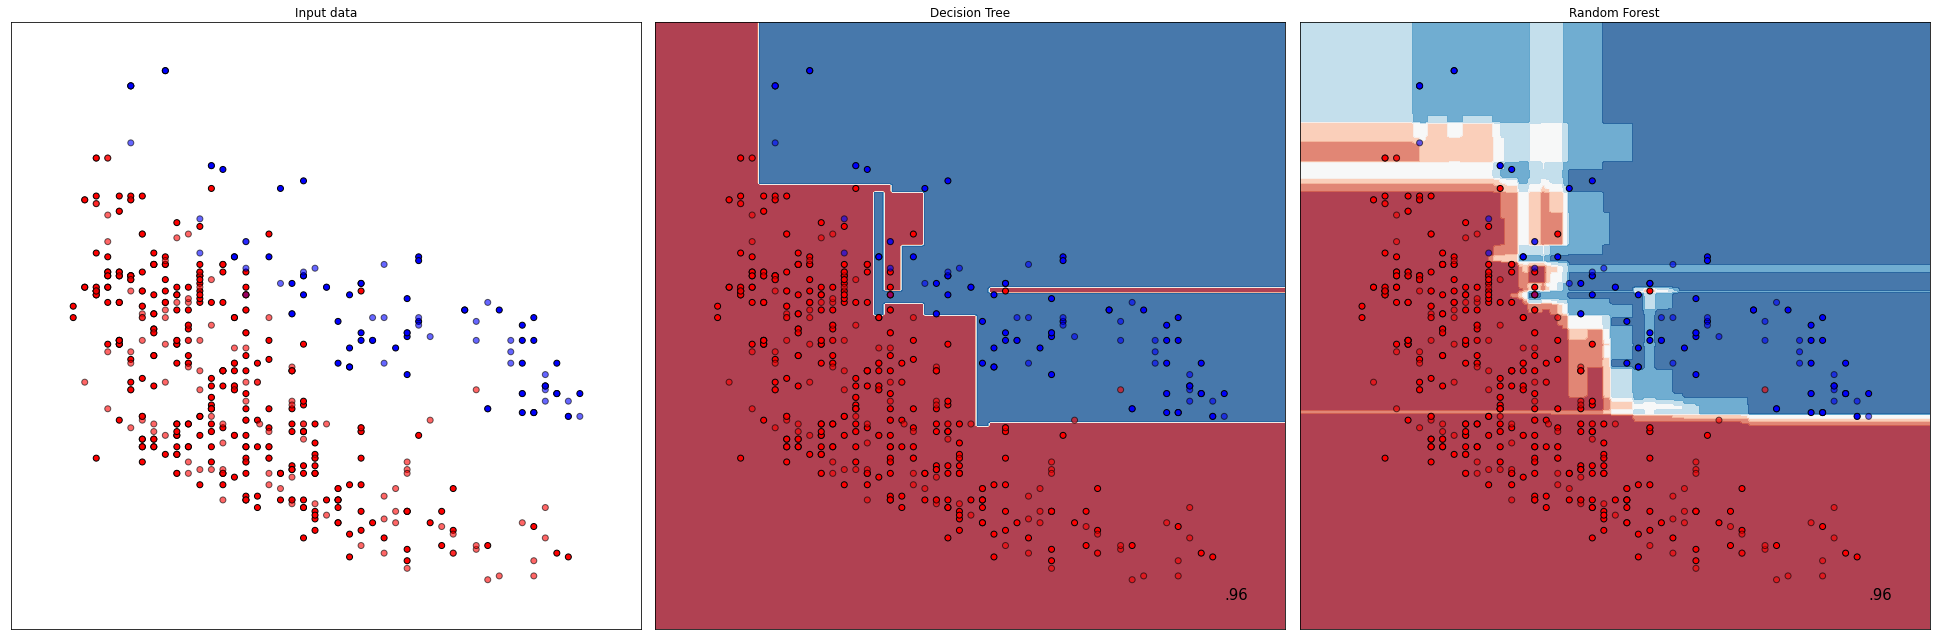

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

h = .02  # step size in the mesh

names = ["Decision Tree", "Random Forest"]

classifiers = [
    DecisionTreeClassifier(), # you can add more model
    RandomForestClassifier(n_estimators=20)]

X = wine[['alcohol','density']]
y = wine['label']
linearly_separable = (X, y)

datasets = [
            linearly_separable # you can add more dataset
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Boosting

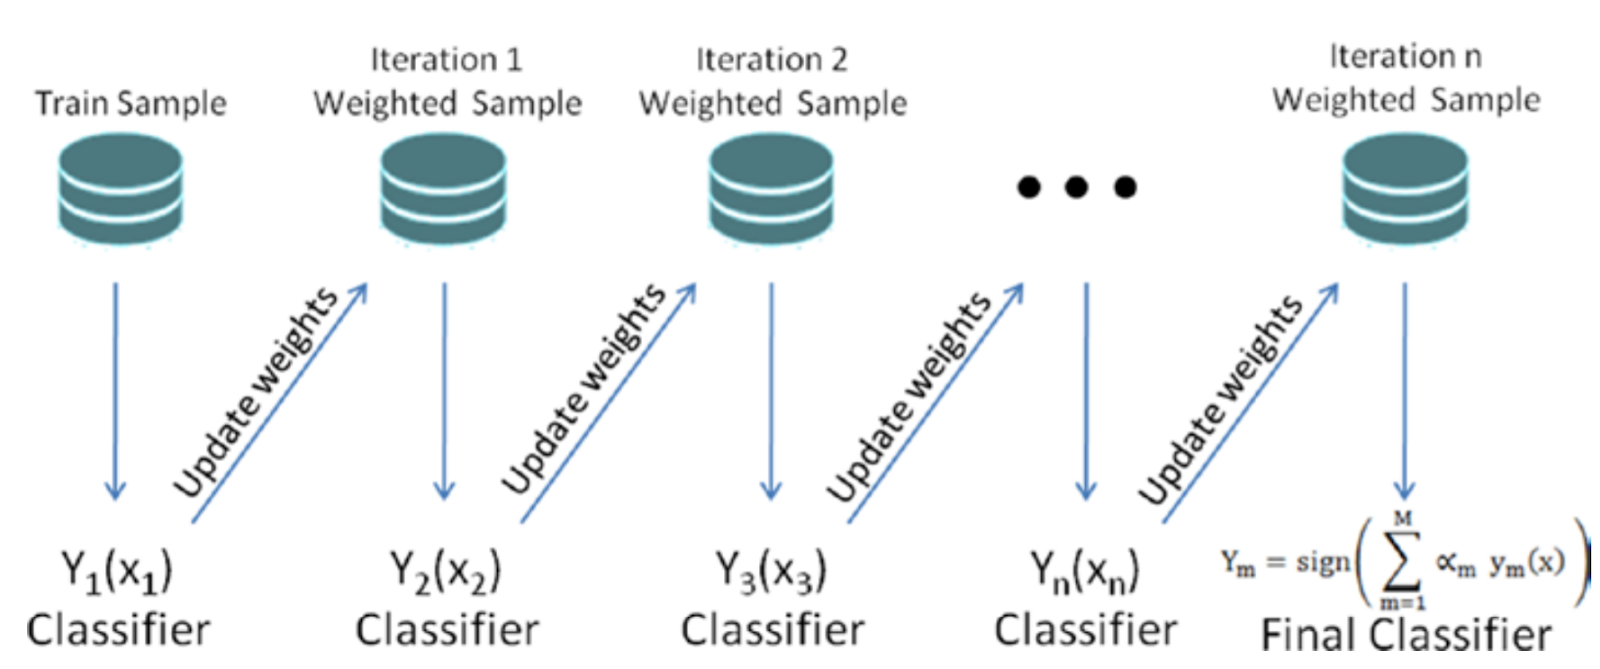

> ## Table Of Contents

1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

In [ ]:
!pip install xgboost

In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

> ## Data

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.


In [ ]:
df_adult = pd.read_csv('adult.csv')

In [ ]:
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


> ## Missing Value

Missing value in this dataset marked with "?"

In [ ]:
df_adult.replace('?',np.nan,inplace = True)

In [ ]:
df_adult.isnull().sum()/df_adult.shape[0]*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

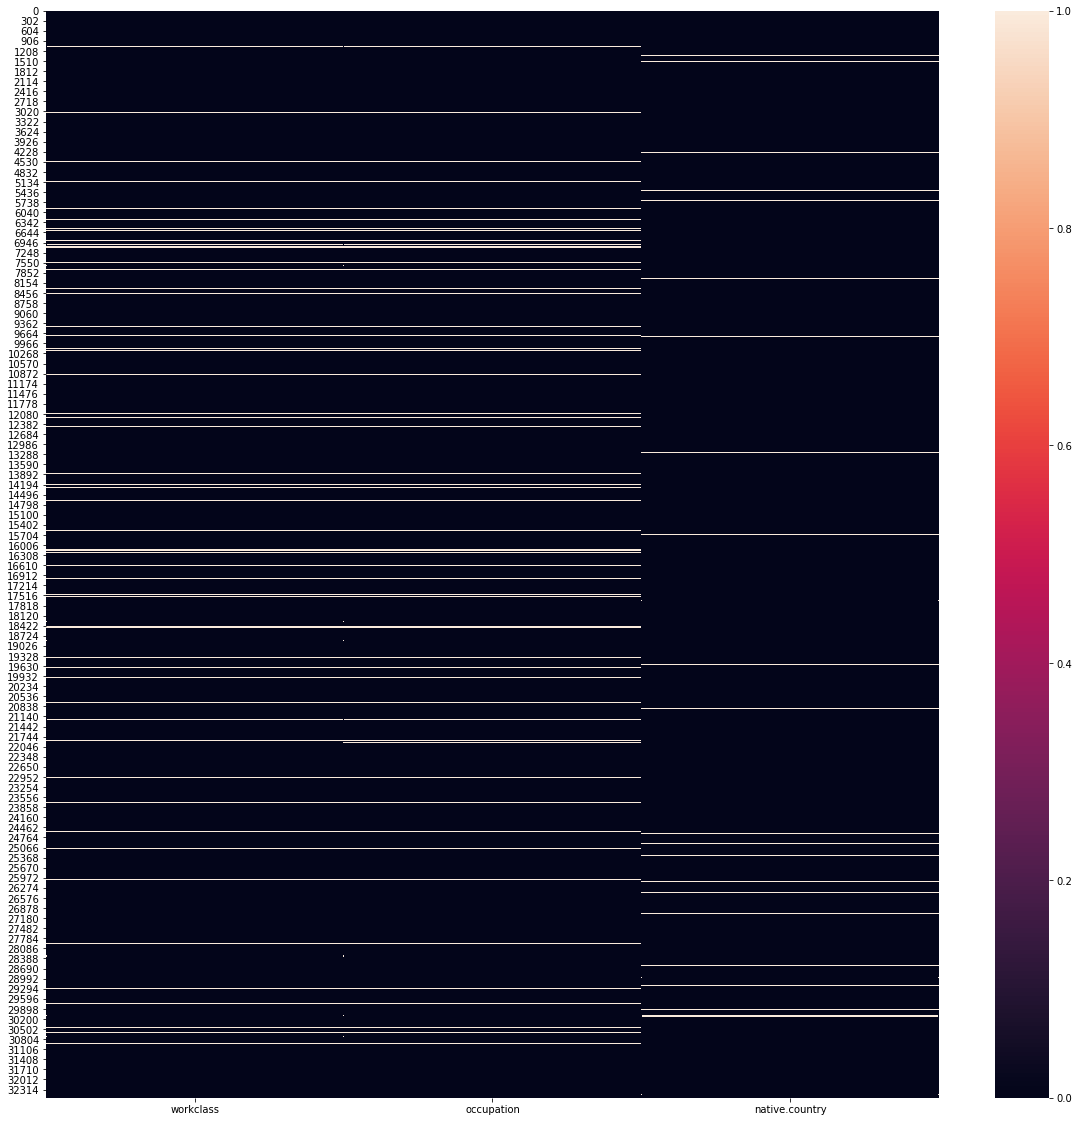

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df_adult[['workclass','occupation','native.country']].isnull())

The Missing Variable:
1. workclass
1. occupation
1. native.country

> ## Preprocessing

In [ ]:
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_adult.describe(include = object)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


preprocess scheme:
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

out:
1. fnlwgt

In [ ]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

> ## Data Splitting

In [ ]:
X = df_adult.drop(columns = ['fnlwgt','income','education'])
y = np.where(df_adult['income']=='>50K',1,0)

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    random_state = 10)

> ## Data Transformation

In [ ]:
X_train_val_preprocessed = transformer.fit_transform(X_train_val)
X_test_preprocessed = transformer.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X_train_val_preprocessed = pd.DataFrame(X_train_val_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_val_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,10.0,0.0,0.0,35.0
24416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51.0,15.0,3325.0,0.0,40.0
24417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,10.0,0.0,0.0,30.0


In [ ]:
transformer.transformers_

[('one hot encoder',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['relationship', 'race', 'sex']),
 ('binary encoder', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value='NC',
                                 missing_values=nan, strategy='constant',
                                 verbose=0)),
                  ('binary encoder',
                   BinaryEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0))],
           verbose=False), ['workclass',
   'marital.status',
   'occupation',
   'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [ ]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [ ]:
transformer.transformers_[1][1]['binary encoder'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary encoder'].get_feature_names() + ['age','education.num','capital.gain','capital.loss','hours.per.week']
X_train_val_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_val_preprocessed

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,0_0,0_1,0_2,0_3,0_4,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,2_4,3_0,3_1,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,10.0,0.0,0.0,35.0
24416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51.0,15.0,3325.0,0.0,40.0
24417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,10.0,0.0,0.0,30.0


> ## Model Fitting and evaluation : Decision Tree

In [ ]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train_val_preprocessed, y_train_val)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X_test_preprocessed)
print('classification_report:',classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.86      0.92      0.89      6181
           1       0.68      0.53      0.59      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141



> ### Model Properties

In [ ]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [ ]:
importance_table

,imp
x0_Not-in-family,0.000000
x0_Other-relative,0.000000
x0_Own-child,0.000000
x0_Unmarried,0.000000
x0_Wife,0.000000
x1_Asian-Pac-Islander,0.000000
x1_Black,0.000000
x1_Other,0.000000
x1_White,0.000000
x2_Male,0.000000


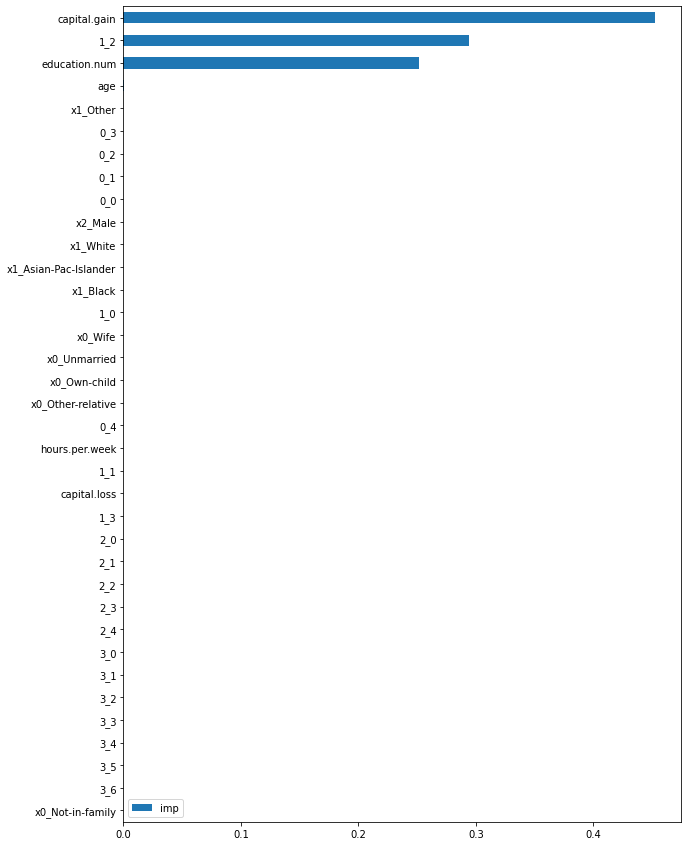

In [ ]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

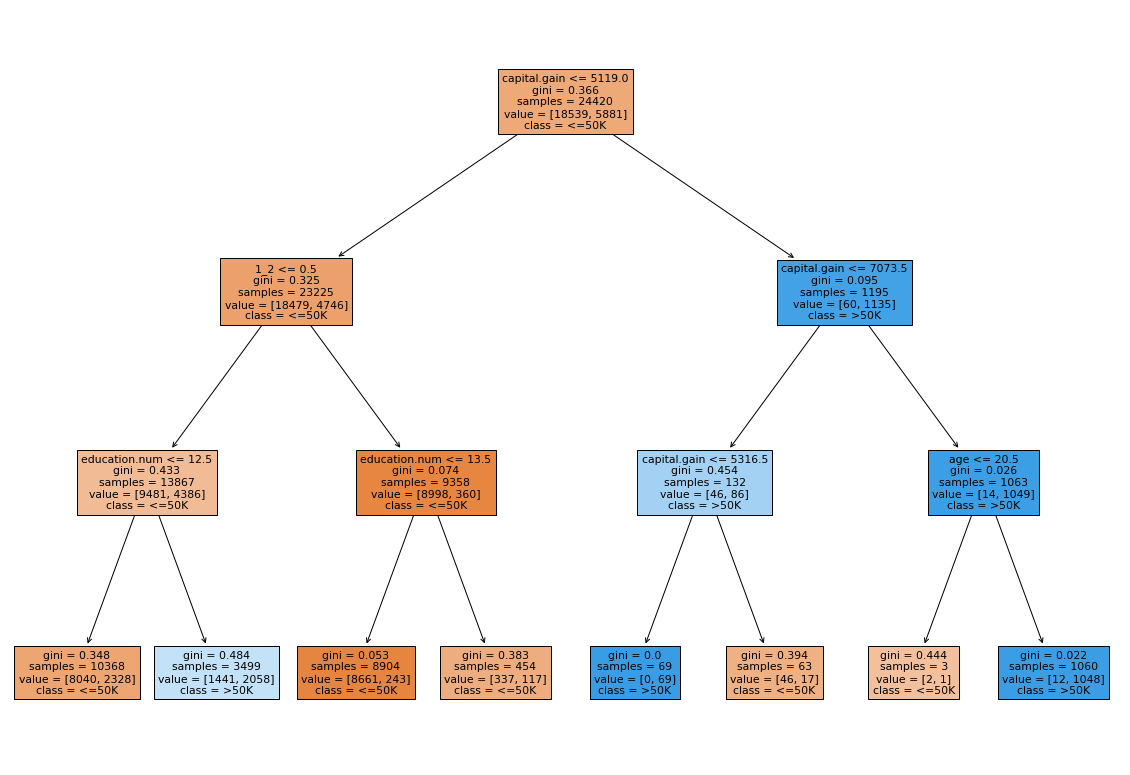

In [ ]:
plt.figure(figsize = (20,14))
plot_tree(model, feature_names = features,filled = True, class_names = ['<=50K','>50K'])
plt.show()

> ## Model Fitting and evaluation : Adaptive Boosting

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3)
model = AdaBoostClassifier(
    tree,
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 10
)
model.fit(X_train_val_preprocessed, y_train_val)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
y_pred = model.predict(X_test_preprocessed)
print('classification_report:',classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6181
           1       0.78      0.63      0.70      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.79      0.81      8141
weighted avg       0.86      0.87      0.86      8141



> ### Model Properties

In [ ]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [ ]:
importance_table

,imp
x0_Not-in-family,0.009602
x0_Other-relative,0.009289
x0_Own-child,0.014575
x0_Unmarried,0.010174
x0_Wife,0.030319
x1_Asian-Pac-Islander,0.009420
x1_Black,0.011038
x1_Other,0.004983
x1_White,0.006060
x2_Male,0.025846


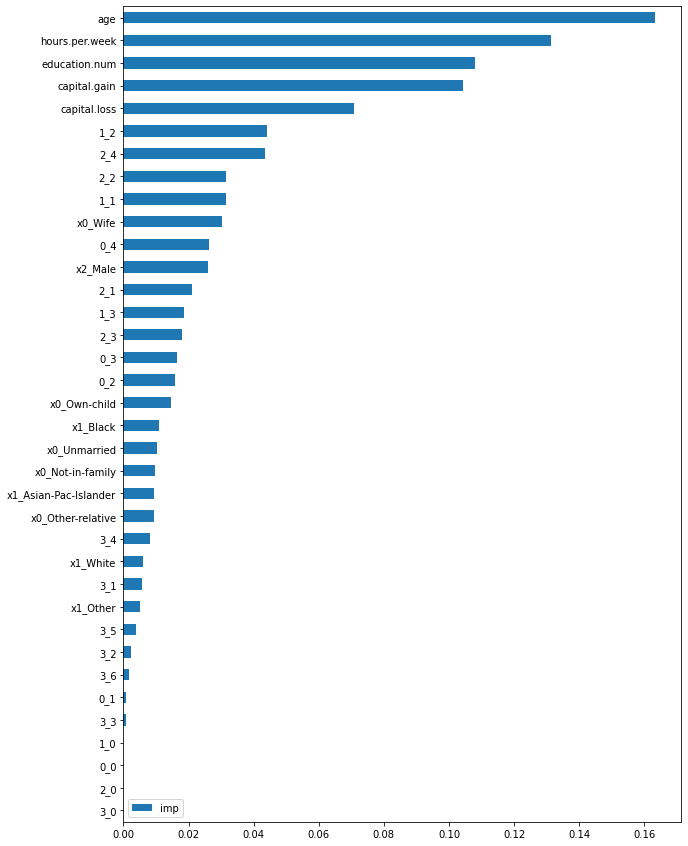

In [ ]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

> ## Model Fitting and evaluation : Gradient Boosting

In [ ]:
model = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 10
)

model.fit(X_train_val_preprocessed, y_train_val)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = model.predict(X_test_preprocessed)
print('classification_report:',classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.88      0.95      0.92      6181
           1       0.79      0.61      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141



> ### Model Properties

In [ ]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [ ]:
importance_table

,imp
x0_Not-in-family,0.004850
x0_Other-relative,0.000241
x0_Own-child,0.001212
x0_Unmarried,0.001823
x0_Wife,0.008601
x1_Asian-Pac-Islander,0.000321
x1_Black,0.000388
x1_Other,0.000033
x1_White,0.000492
x2_Male,0.009060


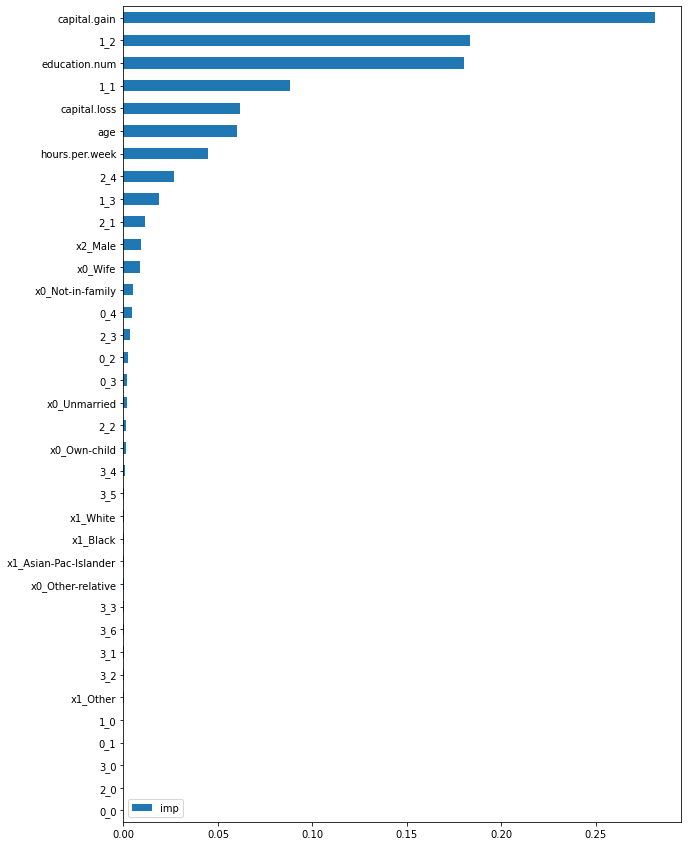

In [ ]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

> ## Model Fitting and evaluation : Extreme Gradient Boosting

In [ ]:
model = XGBClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 10
)
model.fit(X_train_val_preprocessed, y_train_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test_preprocessed)
print('classification_report:',classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.89      0.95      0.92      6181
           1       0.79      0.61      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141



> ### Model Properties

In [ ]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [ ]:
importance_table

,imp
x0_Not-in-family,0.019065
x0_Other-relative,0.005950
x0_Own-child,0.032394
x0_Unmarried,0.007194
x0_Wife,0.013635
x1_Asian-Pac-Islander,0.003121
x1_Black,0.003516
x1_Other,0.002723
x1_White,0.004893
x2_Male,0.023829


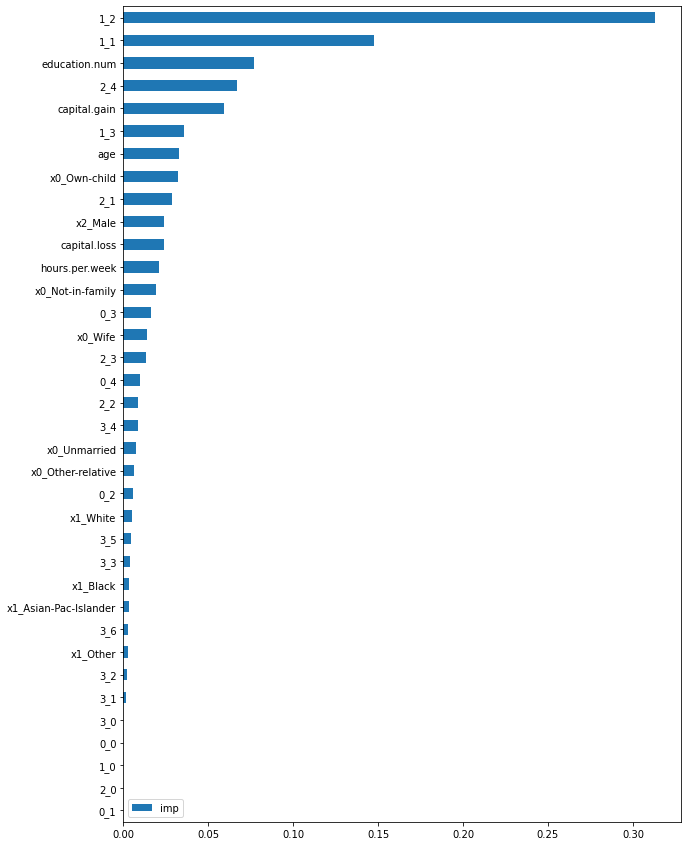

In [ ]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

> ## Model Selection

In [ ]:
model_tree = DecisionTreeClassifier(max_depth = 3)

model_ada = AdaBoostClassifier(
    tree,
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 10
)

model_gbc = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 10
)

model_xgb = XGBClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 10
)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)                 
])

hyperparam_space = {
    'clf':[model_tree, model_ada, model_gbc, model_xgb]
}

skfold = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [ ]:
grid_search.fit(X_train_val, y_train_val)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop='first',
                       

In [ ]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.7057867145402181
best param {'clf': AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                        

In [ ]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(mem

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6181
           1       0.78      0.63      0.70      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.79      0.81      8141
weighted avg       0.86      0.87      0.86      8141



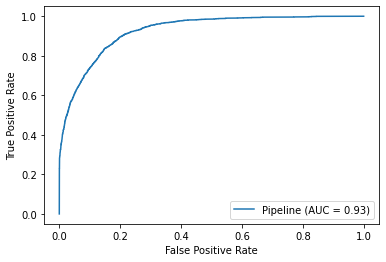

In [ ]:
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)

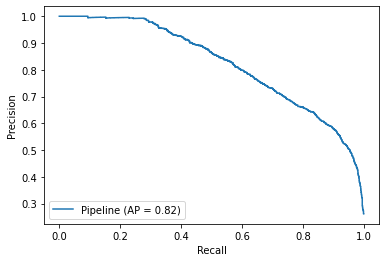

In [ ]:
plot_precision_recall_curve(grid_search.best_estimator_, X_test, y_test)

> ## Hyperparameter Tuning for The Selected Model

In [ ]:
model_tree = DecisionTreeClassifier(max_depth = 3)

model_ada = AdaBoostClassifier(
    tree,
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 10
)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model_ada)                 
])

hyperparam_space = [
                    {'clf__learning_rate':[0.1],'clf__n_estimators':[200],'clf__base_estimator__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.05],'clf__n_estimators':[400],'clf__base_estimator__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.01],'clf__n_estimators':[2000],'clf__base_estimator__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.005],'clf__n_estimators':[4000],'clf__base_estimator__max_depth':[3,4,5]}
]

skfold = StratifiedKFold(n_splits = 5)

grid_search_ada = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [ ]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'clf', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__one hot encoder', 'preprocess__binary encoder', 'preprocess__one hot encoder__categories', 'preprocess__one hot encoder__drop', 'preprocess__one hot encoder__dtype', 'preprocess__one hot encoder__handle_unknown', 'preprocess__one hot encoder__sparse', 'preprocess__binary encoder__memory', 'preprocess__binary encoder__steps', 'preprocess__binary encoder__verbose', 'preprocess__binary encoder__imputer', 'preprocess__binary encoder__binary encoder', 'preprocess__binary encoder__imputer__add_indicator', 'preprocess__binary encoder__imputer__copy', 'preprocess__binary encoder__imputer__fill_value', 'preprocess__binary encoder__imputer__missing_values', 'preprocess__binary encoder__imputer__strategy', 'preprocess__binary encoder__imputer__verbose', 'prepro

In [ ]:
grid_search_ada.fit(X_train_val, y_train_val)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop='first',
                       

In [ ]:
print('best score',grid_search_ada.best_score_)
print('best param',grid_search_ada.best_params_)

best score 0.7075703968096081
best param {'clf__base_estimator__max_depth': 4, 'clf__learning_rate': 0.005, 'clf__n_estimators': 4000}


In [ ]:
grid_search_ada.best_estimator_.fit(X_train_val,y_train_val)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(mem

In [ ]:
y_pred = grid_search_ada.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6181
           1       0.78      0.63      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.83      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141



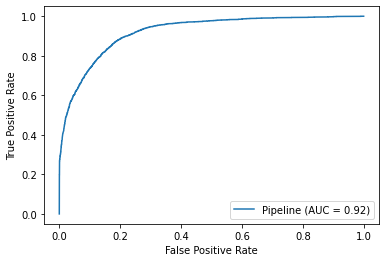

In [ ]:
plot_roc_curve(grid_search_ada.best_estimator_, X_test, y_test)

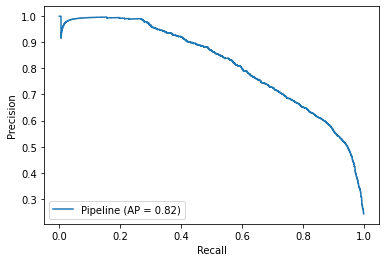

In [ ]:
plot_precision_recall_curve(grid_search_ada.best_estimator_, X_test, y_test)